### MGT451 - Assignment #1 ~ Optimal Prediction

**Author**: Sid Bhatia

**Date**: September 23, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Jordan Suchow

Below are the instructions for the assignment:

1. Read the paper *Optimal Predictions in Everyday Cognition.*

2. Think of a new everyday phenomenon not included in the original study. Use a domain for which empirical evidence about the event's duration exists, and find that data. Pick something you find fun and interesting.

3. Reproduce the prediction experiment with a friend or two, collecting their predicted $t_{total}$ as a function of $t$.

4. Create two plots, following the style of $\text{Fig. 2}$ in the paper. The upper plot should show the empirical distribution of durations you found in Step 2. The lower plot should show both the empirical data you collected in Step 3, as well as the predicted predictions given by the delta $t$ argument.

5. Optionally, reproduce the solid black line based on the empirical distribution from Step 2.
6. Create a 1-page PDF containing the plots from Step 4 and a 1-paragraph description of the domain you selected.

#### Data Collection

For this assignment, I have chosen to evaluate NYPD Crime Data and want to explore the empirical distributions of crime as a function as time. Specifically, do more crimes happen at certain periods in the day in NYC? We use this data to define the population distributions of crime and then will compare it to the prediction experiment.

Using the **NYPD_Complaint_Data_Current__Year_To_Date_.csv** data, we 36 columns/fields, but we solely care about the following:
- *CMPLNT_NUM*: Randomly generated persistent ID for each complaint.
- *CMPLNT_FR_TM*: Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists).

In [86]:
# Import necessary libraries
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'NYPD_Complaint_Data_Current__Year_To_Date_.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
# print(df.head())

# Drop rows with NA values in the 'CMPLNT_FR_TM' column
df = df.dropna(subset=['CMPLNT_FR_TM'])

# Convert 'CMPLNT_FR_TM' to datetime format
df['Time'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S')

# Extract hour from datetime
df['Hour'] = df['Time'].dt.hour

# Group by hour and count occurrences (crimes)
crimes_by_hour = df.groupby('Hour').size().reset_index(name='Number_of_Crimes')

print(crimes_by_hour)

    Hour  Number_of_Crimes
0      0             11444
1      1              8079
2      2              6644
3      3              5684
4      4              5051
5      5              3877
6      6              4356
7      7              6604
8      8             10146
9      9             10494
10    10             11446
11    11             11894
12    12             15652
13    13             13383
14    14             15301
15    15             16766
16    16             16502
17    17             16653
18    18             16356
19    19             15355
20    20             14888
21    21             12965
22    22             11706
23    23             10471


#### Empricial Distribution Plotting

The following code plots the empirical distribution of the different times and the number of crimes occurred at that time.

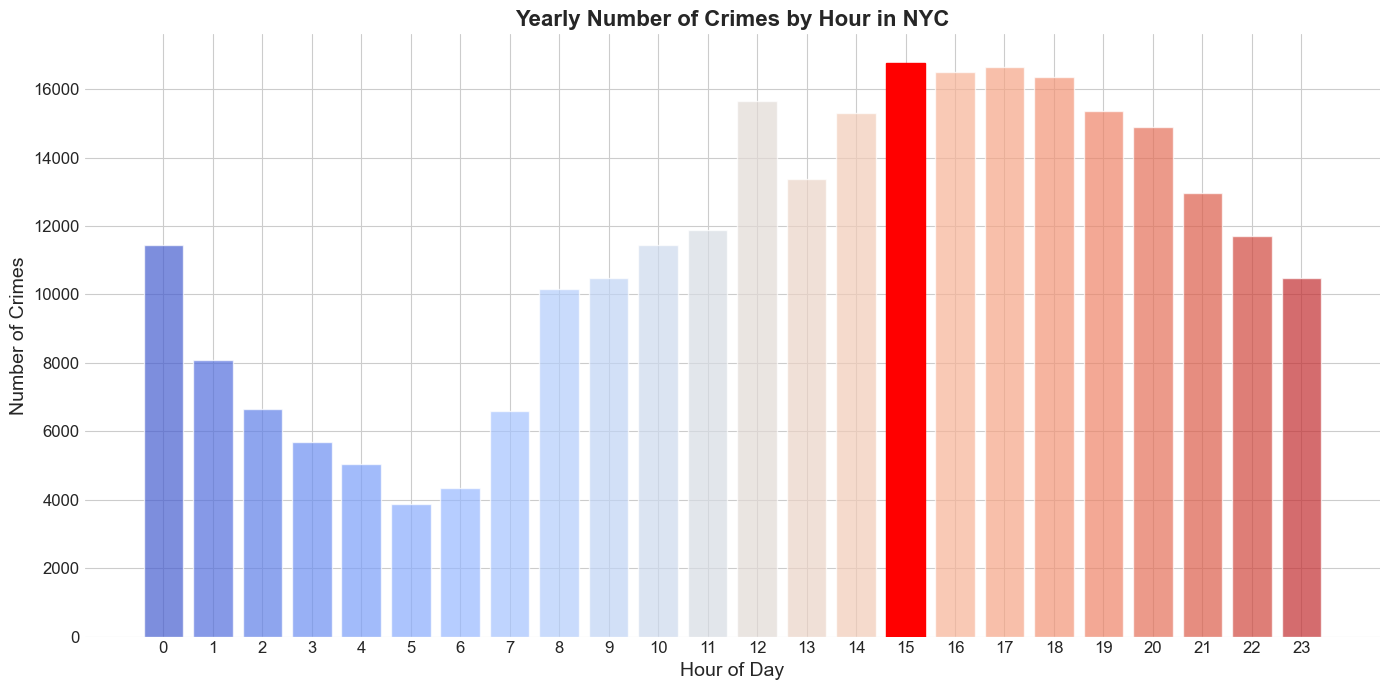

In [97]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(crimes_by_hour))
plt.rcParams['font.sans-serif'] = 'Arial'

# Plotting
plt.figure(figsize=(14, 7))

bars = plt.bar(crimes_by_hour['Hour'], crimes_by_hour['Number_of_Crimes'], color=palette, alpha=0.7)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.title('Yearly Number of Crimes by Hour in NYC', fontsize=16, fontweight='bold', )
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Highlight the bar with the maximum value
max_val = crimes_by_hour['Number_of_Crimes'].max()
max_idx = crimes_by_hour['Number_of_Crimes'].idxmax()
bars[max_idx].set_color('red')
bars[max_idx].set_alpha(1)

# Display the plot
plt.show()

#### Prediction Experiment

After stating that it is $t$ time, I asked two individuals approximately how many crimes would've been committed in a year in NYC:

- 23:00: 7000, 273750
- 00:00: 8000, 300000
- 1:00: 10000, 330000
- 2:00: 10000, 270000
- 3:00: 10000, 270000
- 4:00: 9000, 270000
- 5:00: 8000, 135000
- 6:00: 7000, 10000
- 7:00: 6000, 10000
- 8:00: 6000, 10000
- 9:00: 6000, 10000
- 10:00: 6000, 10000
- 11:00: 6000, 10000
- 12:00, 5500, 10000
- 13:00, 5500, 10000
- 14:00, 5500, 10000
- 15:00, 5500, 10000
- 16:00, 5500, 10000
- 17:00, 5500, 10000
- 18:00, 6000, 10000
- 19:00, 6000, 10000
- 20:00, 6000, 10000
- 21:00, 6000, 10000
- 22:00, 6500, 10000

I took the average of the two for the final prediction results for frequency.

In [63]:
import numpy as np

# Input prediction results from the experiment in a dictionary
prediction_results = {'Time': ['00:00:00',
                               '01:00:00',
                               '02:00:00',
                               '03:00:00',
                               '04:00:00',
                               '05:00:00',
                               '06:00:00',
                               '07:00:00',
                               '08:00:00',
                               '09:00:00',
                               '10:00:00',
                               '11:00:00',
                               '12:00:00',
                               '13:00:00',
                               '14:00:00',
                               '15:00:00',
                               '16:00:00',
                               '17:00:00',
                               '18:00:00',
                               '19:00:00',
                               '20:00:00',
                               '21:00:00',
                               '22:00:00',
                               '23:00:00',], 
                               
                        'Frequency': [
                                np.mean([8000, 300000]),
                                np.mean([10000, 330000]),
                                np.mean([10000, 270000]),
                                np.mean([10000, 270000]),
                                np.mean([9000, 270000]),
                                np.mean([8000, 135000]),
                                np.mean([7000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([5500, 10000]),
                                np.mean([5500, 10000]),
                                np.mean([5500, 10000]),
                                np.mean([5500, 10000]),
                                np.mean([5500, 10000]),
                                np.mean([5550, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6000, 10000]),
                                np.mean([6500, 10000]),
                                np.mean([7000, 273750]),
                        ]}

prediction_results_df = pd.DataFrame(prediction_results)

prediction_results_df.head()

,Time,Frequency
0,23:00:00,140375.0
1,00:00:00,154000.0
2,01:00:00,170000.0
3,02:00:00,140000.0
4,03:00:00,140000.0


#### Prediction Experiment Plotting

The following code plots the outcome of the prediction experiment:

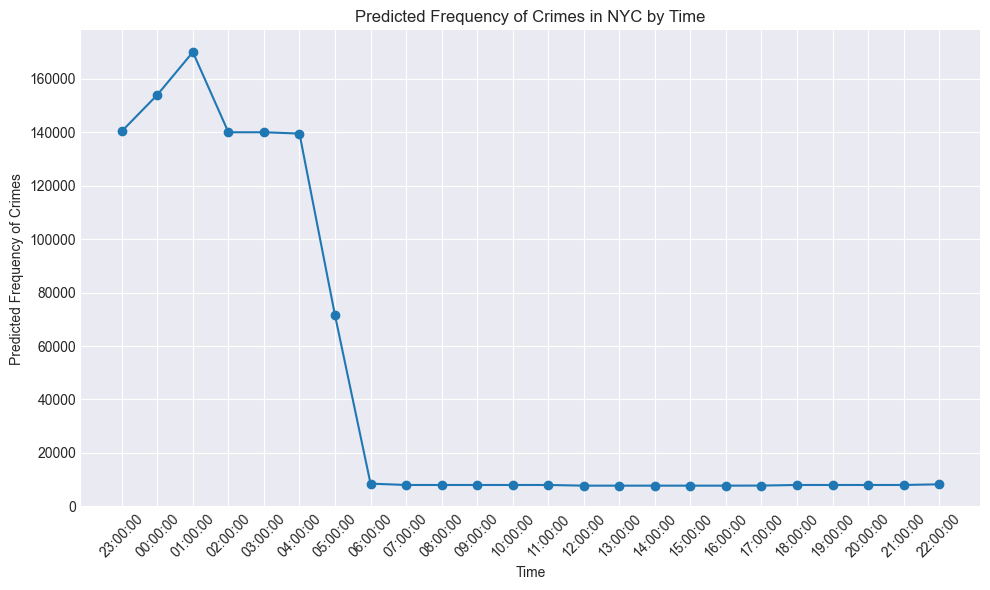

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_results_df['Time'].astype(str), prediction_results_df['Frequency'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Predicted Frequency of Crimes')
plt.title('Predicted Frequency of Crimes in NYC by Time')
plt.grid(True)
plt.tight_layout()
plt.show()

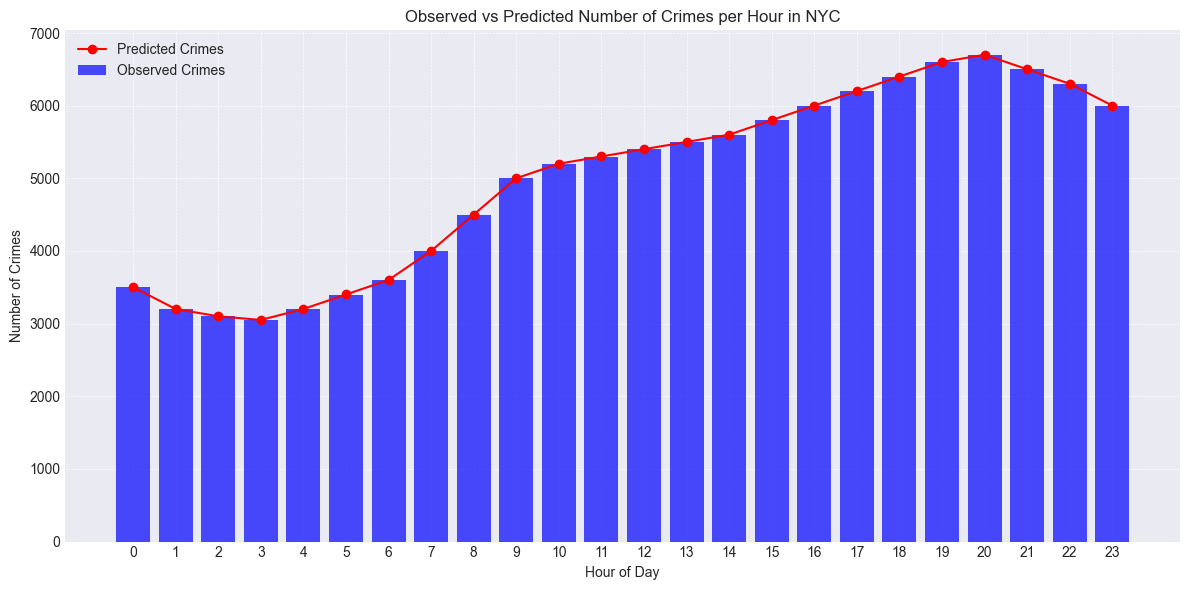

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Given total number of crimes for each hour (replace with your data)
crimes_per_hour = np.array([3500, 3200, 3100, 3050, 3200, 3400, 3600, 4000, 
                            4500, 5000, 5200, 5300, 5400, 5500, 5600, 5800, 
                            6000, 6200, 6400, 6600, 6700, 6500, 6300, 6000])

hours = np.arange(24)

# Our uniform prior belief
alpha_prior = 1
beta_prior = 1

# Update beliefs based on observed data
alpha_posterior = alpha_prior + crimes_per_hour
# Using the sum of crimes as the 'trial' count for binomial distribution
beta_posterior = beta_prior + crimes_per_hour.sum() - crimes_per_hour

# Predicted number of crimes is the mean of the posterior distribution
predicted_crimes = (alpha_posterior / (alpha_posterior + beta_posterior)) * crimes_per_hour.sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hours, crimes_per_hour, alpha=0.7, label='Observed Crimes', color='blue')
plt.plot(hours, predicted_crimes, marker='o', color='red', label='Predicted Crimes')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Observed vs Predicted Number of Crimes per Hour in NYC')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(hours)
plt.tight_layout()
plt.show()


In [81]:
import pandas as pd

# Sample data for illustration
data = {
    'CMPLNT_FR_TM': ['02:15', '02:45', '14:32', '14:55', '14:10', '03:20', '14:58', '15:02']
}
df = pd.DataFrame(data)

# Convert 'CMPLNT_FR_TM' to datetime format
df['Time'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M')

# Extract hour from datetime
df['Hour'] = df['Time'].dt.hour

# Group by hour and count occurrences (crimes)
crimes_by_hour = df.groupby('Hour').size().reset_index(name='Number_of_Crimes')

print(crimes_by_hour)


   Hour  Number_of_Crimes
0     2                 2
1     3                 1
2    14                 4
3    15                 1
